<a href="https://colab.research.google.com/github/ahmadsanafarooq/Data-Science-Machine-Learning-Nodebook/blob/main/DL_Practise_4_ANN_with_chinese_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings as wn
wn.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten

# **Dataset**

In [3]:
dataset=pd.read_csv('/content/chinese_mnist.csv')

# **Data Processing**

In [37]:
dataset.head()

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九


In [4]:
dataset.isnull().sum()

,0
suite_id,0
sample_id,0
code,0
value,0
character,0


In [5]:
dataset.duplicated().sum()

np.int64(0)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   suite_id   15000 non-null  int64 
 1   sample_id  15000 non-null  int64 
 2   code       15000 non-null  int64 
 3   value      15000 non-null  int64 
 4   character  15000 non-null  object
dtypes: int64(4), object(1)
memory usage: 586.1+ KB


In [7]:
categorical_column=dataset.select_dtypes(include=['object']).columns
categorical_column

Index(['character'], dtype='object')

In [8]:
dataset=pd.get_dummies(dataset,columns=categorical_column,drop_first=True)

# **Feature Selection**

In [25]:
x=dataset.drop(['code'],axis=1)
y = dataset['code'] - 1
print(np.unique(y))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


# **Spliting Data**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# **Sacaling Data**

In [27]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((12000, 17), (12000,), (3000, 17), (3000,))

In [28]:
X_test=X_test/255
X_train=X_train/255

# **Create Model & Layers**

In [29]:
model=Sequential([
 tf.keras.layers.Dense(128,activation='relu',input_shape=(X_train.shape[1],)),
 tf.keras.layers.Dense(64,activation='relu'),
 tf.keras.layers.Dense(15,activation='softmax')
])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,535 (45.06 KB)

 Trainable params: 11,535 (45.06 KB)

 Non-trainable params: 0 (0.00 B)

# **Compile Model**

In [30]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# **Train Model**

In [31]:
hist=model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1700 - loss: 577.2969 - val_accuracy: 0.2629 - val_loss: 2.5189
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2898 - loss: 2.4293 - val_accuracy: 0.3471 - val_loss: 2.2540
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3278 - loss: 2.1058 - val_accuracy: 0.4246 - val_loss: 1.7248
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4365 - loss: 1.6808 - val_accuracy: 0.6062 - val_loss: 1.5512
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4930 - loss: 1.4984 - val_accuracy: 0.5825 - val_loss: 1.3662
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5814 - loss: 1.3118 - val_accuracy: 0.6596 - val_loss: 1.1848
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7024 - loss: 1.1427 - val_accuracy: 0.8146 - val_loss: 1.0228
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8009 - loss: 0.9863 - val_accuracy: 

# **Evaluate Model**

In [32]:
loss,accuracy=model.evaluate(X_test,y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.5398
Loss: 0.5512517690658569
Accuracy: 1.0


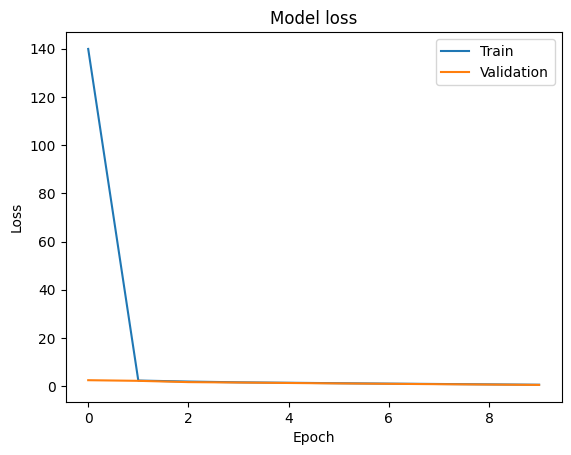

In [36]:
# Plotting the training and testing loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()